# Môn Trực quan hoá dữ liệu
* Bài tập: thực hành 2
* Sinh viên: Huỳnh Thị Bảo Trân
* MSSV: 19110482

**Đối với những câu vẽ thì luôn phải có "Nhận xét" về các biểu đồ/ đồ thị đã vẽ. "Giải thích" vì sao lại ưu tiên biểu đồ/ đồ thị đó trong từng data (Đồ thị/ biểu đồ nào vẽ trước thì ưu tiên trước)**.

In [1]:
# cac thu vien da duoc su dung (neu co)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Load data ('COVID-19.csv') và trích lấy dữ liệu các cột sau: 'day','month','year','cases', 'deaths', 'countriesAndTerritories', 'continentExp' ( trích data này là data để thực hiện các yêu cầu dưới).

In [2]:
# doc du lieu tu file csv

data_fi = pd.read_excel("COVID-19.xlsx", engine = 'openpyxl')
# lay cac du lieu can thiet
data = data_fi[['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'continentExp']]
print(data)

       day  month  year  cases  deaths countriesAndTerritories continentExp
0       11     11  2020      0       0             Afghanistan         Asia
1       10     11  2020    224      12             Afghanistan         Asia
2        9     11  2020     80       3             Afghanistan         Asia
3        8     11  2020    126       6             Afghanistan         Asia
4        7     11  2020     58       2             Afghanistan         Asia
...    ...    ...   ...    ...     ...                     ...          ...
54858   25      3  2020      0       0                Zimbabwe       Africa
54859   24      3  2020      0       1                Zimbabwe       Africa
54860   23      3  2020      0       0                Zimbabwe       Africa
54861   22      3  2020      1       0                Zimbabwe       Africa
54862   21      3  2020      1       0                Zimbabwe       Africa

[54863 rows x 7 columns]


2. Tạo các data sau:
* Tổng số "cases" và "deaths" theo từng ngày. (bắt đầu từ ngày 01/01/2020).
* Tổng số "cases" và "deaths" theo từng tháng. (bắt đầu từ tháng 01/2020).
* Tổng số "cases" và "deaths" theo từng quốc gia.

In [3]:
# tong so cases va deaths theo quoc gia

data_countries = data.groupby('countriesAndTerritories').sum()[['cases', 'deaths']]
print(data_countries)

                         cases  deaths
countriesAndTerritories               
Afghanistan              42463    1577
Albania                  25294     579
Algeria                  63446    2077
Andorra                   5477      75
Angola                   12680     308
...                        ...     ...
Wallis_and_Futuna            1       0
Western_Sahara             766       1
Yemen                     2070     602
Zambia                   16997     350
Zimbabwe                  8610     255

[214 rows x 2 columns]


In [4]:
# tong so cases va deaths theo thang

# trich du lieu ngay tu nam 2020
data_month = data.loc[data['year'] >= 2020]
# trich tong so cases va deaths theo thang tu nam 2020
data_month = data_month.groupby('month').sum()[['cases', 'deaths']]
print(data_month)

          cases  deaths
month                  
1          9799     213
2         75422    2708
3        723717   35808
4       2339583  189179
5       2891997  140143
6       4249523  134069
7       7067515  166195
8       7963815  178619
9       8456249  162171
10     11948833  181041
11      5826395   84165


In [5]:
# tong so cases va deaths theo ngay

# trich du lieu ngay tu nam 2020
data_date = data.loc[data['year'] >= 2020]
# trich tong so cases va deaths theo ngay tu nam 2020
data_date = data_date.groupby('day').sum()[['cases', 'deaths']]
print(data_date)

       cases  deaths
day                 
1    1760648   41666
2    1817216   45055
3    1780338   41532
4    1791139   45755
5    1886762   45282
6    1874852   43927
7    1914676   49172
8    1911754   46246
9    1898663   46331
10   1950064   47169
11   1936717   46284
12   1379565   35570
13   1378346   36000
14   1379133   38163
15   1456929   38636
16   1510020   44046
17   1510451   41543
18   1495457   39761
19   1487705   38630
20   1516793   36587
21   1530282   36397
22   1574924   41575
23   1647681   40726
24   1687595   44441
25   1662964   36173
26   1689161   41062
27   1651943   36371
28   1678268   40107
29   1691038   40647
30   1831718   43933
31   1270046   25524


3. Tương ứng với từng data trên, vẽ các đồ thị/ biểu đồ(ít nhất 3) sao cho các bạn nghĩ các đồ thị đó phù hợp nhất để mô tả "global pattern" về "cases" và "deaths".

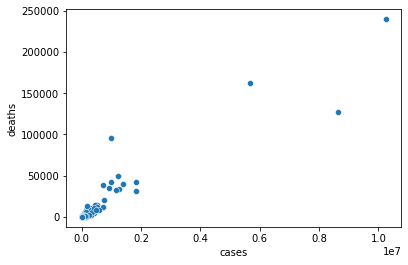

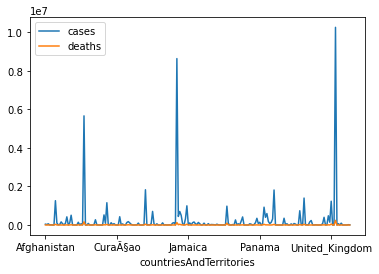

<AxesSubplot:ylabel='countriesAndTerritories'>

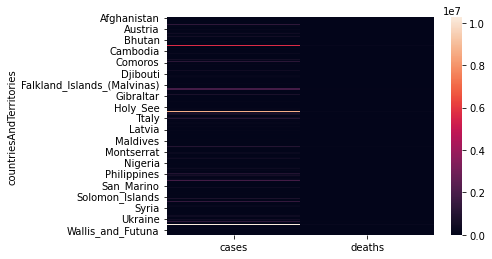

In [6]:
# Ve do thi tong so cases va deaths theo quoc gia

ax = sns.scatterplot(x = 'cases', y = 'deaths', data = data_countries)
plt.show()

data_countries.plot(kind = 'line')
plt.show()

sns.heatmap(data_countries)

# sns.jointplot(data_countries.cases, data_countries.deaths, kind = 'hex')

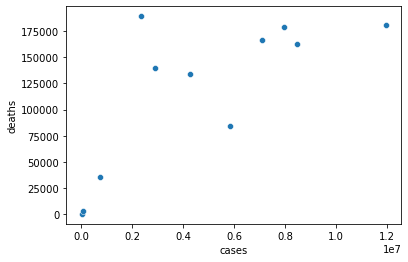

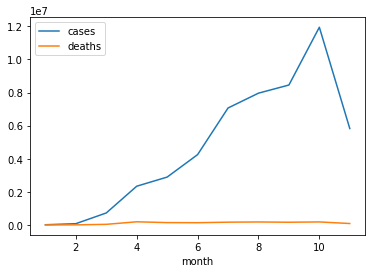

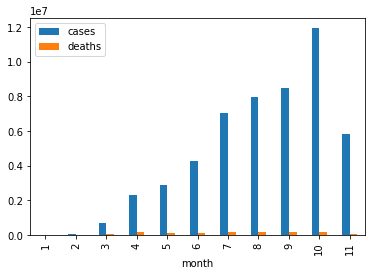

<AxesSubplot:xlabel='month'>

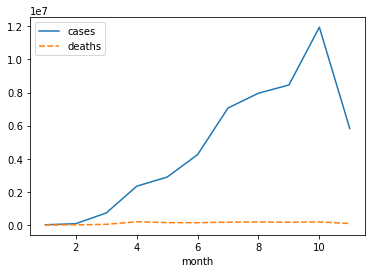

In [7]:
# ve do thi theo tong so cases va deaths theo thang

ax = sns.scatterplot(x = 'cases', y = 'deaths', data = data_month)
plt.show()

data_month.plot(kind = 'line')
plt.show()

data_month.plot( y = ['cases', 'deaths'], kind = 'bar')
plt.show()

sns.lineplot(data = data_month)

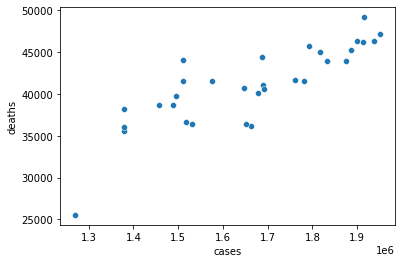

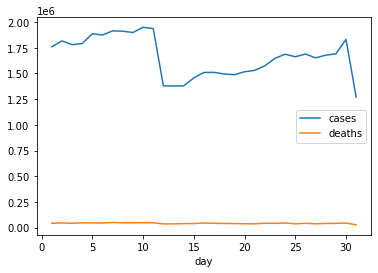

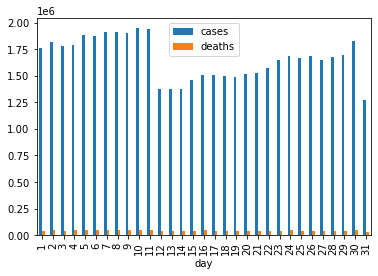

C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


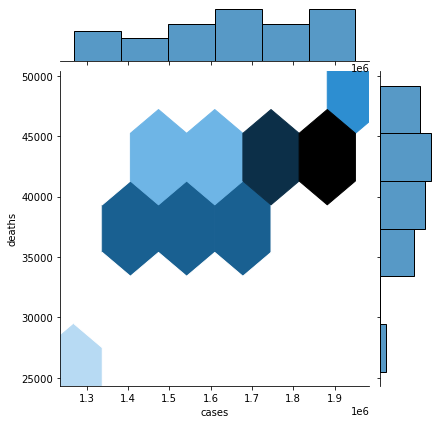

In [8]:
# ve do thi theo tong so cases va deaths theo ngay

ax = sns.scatterplot(x = 'cases', y = 'deaths', data = data_date)
plt.show()

data_date.plot(kind = 'line')
plt.show()

data_date.plot(y = ['cases', 'deaths'], kind = 'bar')
plt.show()

sns.jointplot(data_date.cases, data_date.deaths, kind = 'hex')

4. Vẽ các đồ thị sao cho bạn nghĩ các đồ thị/ biểu đồ đó phù hợp nhất để mô tả "summary statistics" về đặc điểm của tổng số "cases" và tổng số "deaths" theo từng tháng và được phân tách theo từng khu vực.

          cases  deaths
month                  
1          9799     213
2         75422    2708
3        723717   35808
4       2339583  189179
5       2891997  140143
6       4249523  134069
7       7067515  166195
8       7963815  178619
9       8456249  162171
10     11948833  181041
11      5826395   84165
12           27       0


C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


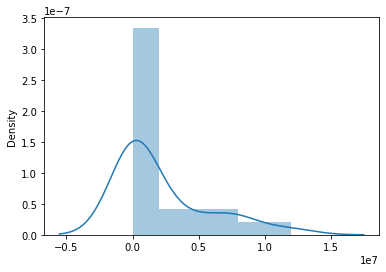

In [9]:
# tong so cases va deaths theo tung thang
data_month_ss = data.groupby('month').sum()[['cases', 'deaths']]
print(data_month_ss)

# ve bieu do the hien
sns.distplot(data_month_ss)
plt.show()

# sns.boxplot(x = 'cases', y = 'deaths', data = data_month_ss)
# plt.show()

                 cases  deaths
continentExp                  
Africa         1905250   45947
America       22309031  666122
Asia          14416106  255858
Europe        12875366  305294
Oceania          46426    1083
Other              696       7


C:\Users\Justmechan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


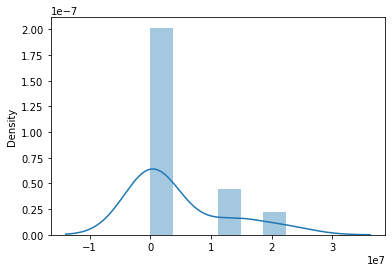

<AxesSubplot:xlabel='cases', ylabel='deaths'>

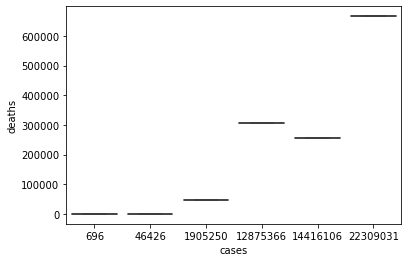

In [14]:
# tong so cases va deaths theo tung khu vuc
data_continentExp_ss = data.groupby('continentExp').sum()[['cases', 'deaths']]
print(data_continentExp_ss)

# ve bieu do the hien
sns.distplot(data_continentExp_ss)
plt.show()

sns.boxplot(x = 'cases', y = 'deaths', data = data_continentExp_ss)
# plt.show()

5. Trích data của nước Việt Nam (bắt đầu từ 01/01/2020)

* Thông kê Tổng số "cases" và "deaths" theo từng ngày, vẽ đồ thị/biểu đồ thích hợp để mô tả về "cases" và "deaths".

* Thông kê Tổng số "cases" và "deaths" theo từng tháng, vẽ đồ thị/biểu đồ thích hợp để mô tả về "cases" và "deaths".

In [11]:
# trich du lieu tu nam 2020

data_2020 = data.loc[data['year'] >= 2020]

# trich du lieu cases va deaths theo Viet Nam

data_VN = data_2020.loc[data.countriesAndTerritories == 'Vietnam']
print(data_VN)

       day  month  year  cases  deaths countriesAndTerritories continentExp
53634   11     11  2020     10       0                 Vietnam         Asia
53635   10     11  2020      3       0                 Vietnam         Asia
53636    9     11  2020      0       0                 Vietnam         Asia
53637    8     11  2020      0       0                 Vietnam         Asia
53638    7     11  2020      6       0                 Vietnam         Asia
...    ...    ...   ...    ...     ...                     ...          ...
53941    5      1  2020      0       0                 Vietnam         Asia
53942    4      1  2020      0       0                 Vietnam         Asia
53943    3      1  2020      0       0                 Vietnam         Asia
53944    2      1  2020      0       0                 Vietnam         Asia
53945    1      1  2020      0       0                 Vietnam         Asia

[312 rows x 7 columns]


     cases  deaths
day               
1       63       5
2       56       2
3       50       2
4       48       2
5       26       0
6       54       1
7       63       1
8       64       0
9       44       0
10      48       3
11      24       0
12      28       4
13      29       1
14      48       3
15      53       0
16      11       1
17      40       2
18      33       1
19      35       0
20      29       0
21      15       0
22      41       0
23      41       1
24      22       1
25      30       0
26      32       0
27      23       3
28      30       0
29      26       1
30      64       1
31      56       0


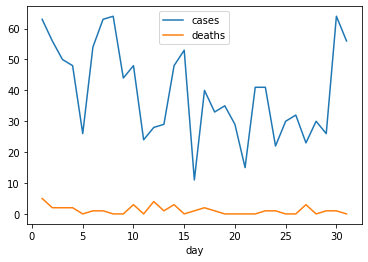

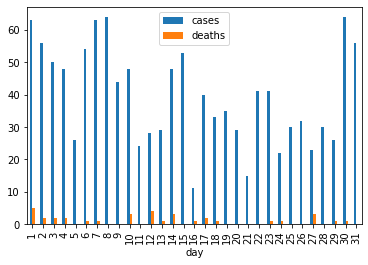

In [12]:
# tong so cases va deaths cau Viet Nam theo ngay

data_day_VN = data_VN.groupby('day').sum()[['cases', 'deaths']]
print(data_day_VN)

# ve bieu do the hien

data_day_VN.plot(kind = 'line')
plt.show()

data_day_VN.plot(y = ['cases', 'deaths'], kind = 'bar')
plt.show()

       cases  deaths
month               
1          5       0
2         11       0
3        190       0
4         64       0
5         57       0
6         28       0
7        154       0
8        531      32
9         54       3
10        83       0
11        49       0


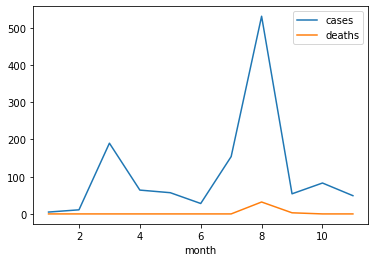

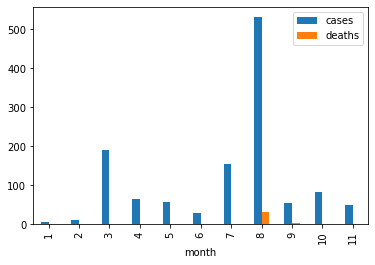

In [13]:
# tong so cases va deaths cau Viet Nam theo thang

data_month_VN = data_VN.groupby('month').sum()[['cases', 'deaths']]
print(data_month_VN)

# ve bieu do the hien

data_month_VN.plot(kind = 'line')
plt.show()

data_month_VN.plot(y = ['cases', 'deaths'], kind = 'bar')
plt.show()